In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


train_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Train"
test_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Test"
val_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Validation"

datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)


Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.
Found 202 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers[:249]:
    layer.trainable = False

for layer in base_model.layers[249:]:
    layer.trainable = True


model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.2),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


epochs = 10
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)




model.save('/content/drive/MyDrive/Colab Notebooks/interceptioniledüzveriseti10epoch9ocakgece1.h5')


Epoch 1/10
45/45 [==============================] - 155s 3s/step - loss: 3.5180 - accuracy: 0.5958 - val_loss: 1.7009 - val_accuracy: 0.7525
Epoch 2/10
45/45 [==============================] - 162s 4s/step - loss: 0.3902 - accuracy: 0.9014 - val_loss: 2.7851 - val_accuracy: 0.8465
Epoch 3/10
45/45 [==============================] - 160s 4s/step - loss: 0.2300 - accuracy: 0.9458 - val_loss: 0.7293 - val_accuracy: 0.8911
Epoch 4/10
45/45 [==============================] - 157s 3s/step - loss: 0.2041 - accuracy: 0.9444 - val_loss: 0.4194 - val_accuracy: 0.9158
Epoch 5/10
45/45 [==============================] - 143s 3s/step - loss: 0.1202 - accuracy: 0.9632 - val_loss: 0.1022 - val_accuracy: 0.9653
Epoch 6/10
45/45 [==============================] - 151s 3s/step - loss: 0.0733 - accuracy: 0.9826 - val_loss: 0.1606 - val_accuracy: 0.9505
Epoch 7/10
45/45 [==============================] - 157s 3s/step - loss: 0.0846 - accuracy: 0.9750 - val_loss: 0.1442 - val_accuracy: 0.9554
Epoch 8/10
45

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Colab Notebooks/interceptioniledüzveriseti10epoch9ocakgece1.h5'  
loaded_model = load_model(model_path)


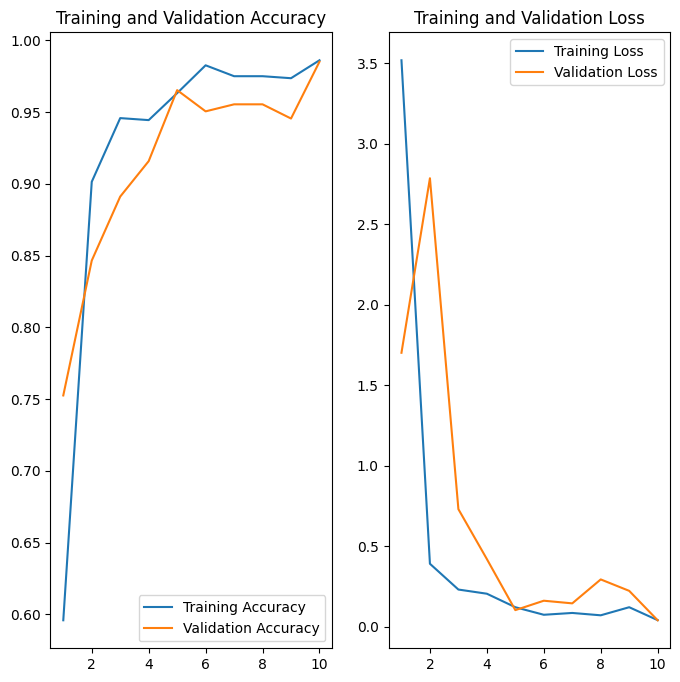

In [10]:
import matplotlib.pyplot as plt

epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'loss': [3.5180, 0.3902, 0.2300, 0.2041, 0.1202, 0.0733, 0.0846, 0.0700, 0.1202, 0.0399],
    'accuracy': [0.5958, 0.9014, 0.9458, 0.9444, 0.9632, 0.9826, 0.9750, 0.9750, 0.9736, 0.9861],
    'val_loss': [1.7009, 2.7851, 0.7293, 0.4194, 0.1022, 0.1606, 0.1442, 0.2929, 0.2219, 0.0391],
    'val_accuracy': [0.7525, 0.8465, 0.8911, 0.9158, 0.9653, 0.9505, 0.9554, 0.9554, 0.9455, 0.9851]
}

epochs_range = epoch_data['epoch']
acc = epoch_data['accuracy']
val_acc = epoch_data['val_accuracy']
loss = epoch_data['loss']
val_loss = epoch_data['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


7/7 [==============================] - 46s 6s/step - loss: 0.1874 - accuracy: 0.9505
Test accuracy: 0.9504950642585754
7/7 [==============================] - 44s 6s/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        21
           2       0.87      1.00      0.93        20
           3       1.00      0.90      0.95        21
           4       0.87      1.00      0.93        20
           5       1.00      1.00      1.00        23
           6       1.00      0.90      0.95        21
           7       0.83      1.00      0.91        15
           8       1.00      1.00      1.00        20
           9       1.00      0.86      0.92        21

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.95       202
weighted avg       0.96      0.96      0.96       202

Overall Precision: 0.96
Overall Recall: 0.96
Ove

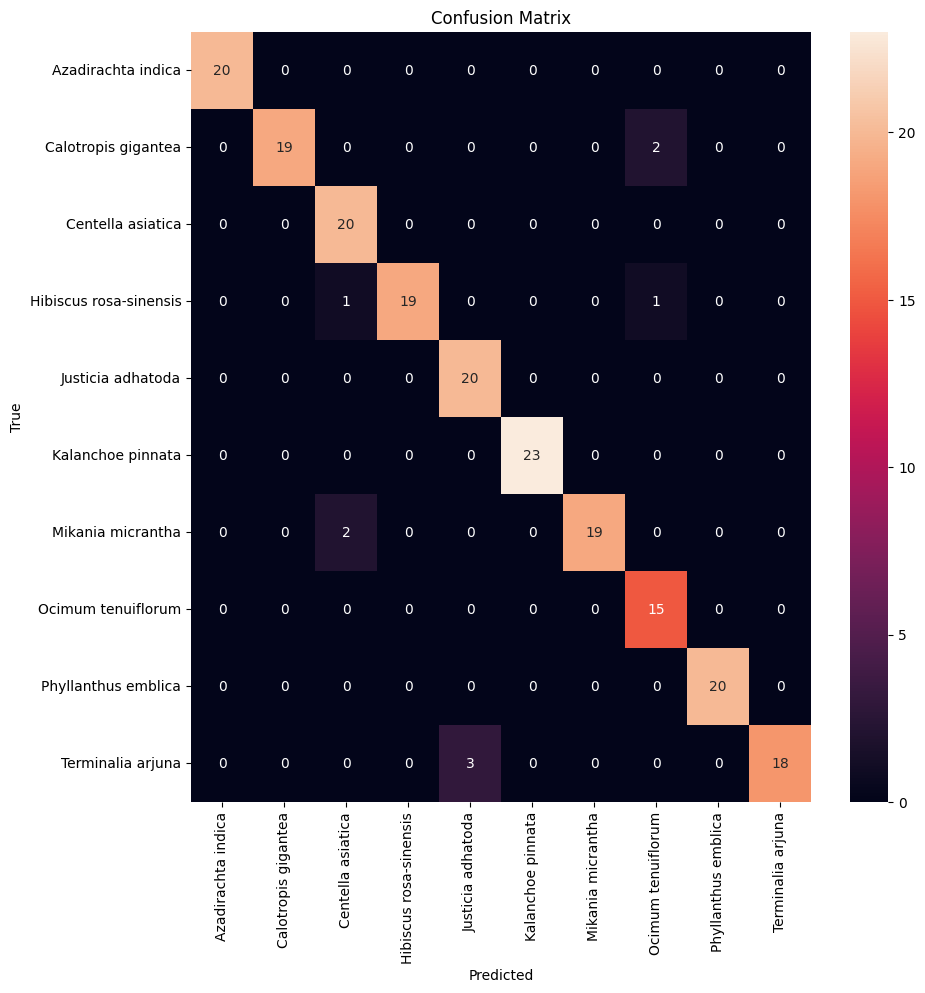

In [12]:

test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')


print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1-score: {f1:.2f}')


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()